# MSA 2025 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

## 1. Find all variables and understand them

### 1.1 Load chosen datasets and display the first ten instances.

In [2]:
# Get the current working directory
current_directory = os.getcwd()

# define a funcion to load the specific file
def load_data(file_name):
    file_path = os.path.join(current_directory, file_name)
    return pd.read_csv(file_path,encoding='latin1')

# define the file names
file_name= "store_sales.csv"

# Load the data
w_store_sales = load_data(file_name)

# Display the first ten instances
print(w_store_sales.head(10))

# Display the number of instances and features
num_instances, num_features = w_store_sales.shape

print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
5      24  US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
6      25  CA-2015-106320   9/25/2015   9/30/2015  Standard Class    EB-13870   
7      28  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
8      30  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
9      37  CA-2016-117590   12/8/2016  12/10/2016     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

It is clear that this dataset involves multiple cities. To verify whether sales span multiple countries, the following code was used. The result confirms that the store's sales are limited to different cities within the United States only

In [3]:
# check the unique values in the 'Country' column
unique_countries = w_store_sales['Country'].unique()
print(f"Unique countries: {unique_countries}") 

unique_countries = w_store_sales['Country'].unique()

Unique countries: ['United States']


The column names indicate that this store sales dataset captures order-level, customer, product, and performance information, enabling multi-dimensional analysis.

In [4]:
# print the column names
print("Column names:", w_store_sales.columns.tolist())

Column names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


### 1.2 Provide key statistical measures

Check the data types of all columns and convert those that are not appropriate. Then perform statistical analysis on the numerical columns.

In [5]:
# Display the data types of the columns
print(w_store_sales.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


From the output above, we can see that “Row ID” and “Postal Code” are numeric but should be treated as identifiers. “Order Date” and “Ship Date” should be converted from object to datetime.

In [6]:
# convert the 'Order Date' and 'Ship Date' columns to datetime type
w_store_sales['Order Date'] = pd.to_datetime(w_store_sales['Order Date'])
w_store_sales['Ship Date'] = pd.to_datetime(w_store_sales['Ship Date'])

# convert the 'Row ID' and 'Postal Code' columns to string type
w_store_sales['Row ID'] = w_store_sales['Row ID'].astype(str)
w_store_sales['Postal Code'] = w_store_sales['Postal Code'].astype(str)

# Display the data types of the columns after conversion
print(w_store_sales.dtypes)

Row ID                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


Perform key statistical analysis on numerical columns.

In [7]:
# describe the data numerical columns
w_store_sales.select_dtypes(include='number').describe()


,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327
std,503.179145,2.251620,0.181547,136.049246
min,1.892000,1.000000,0.000000,-1862.312400
25%,47.040000,2.000000,0.000000,-12.849000
50%,182.220000,3.000000,0.200000,7.774800
75%,435.168000,5.000000,0.300000,33.726600
max,4416.174000,14.000000,0.700000,1013.127000


Key numerical statistics reveal that:

**Sales** values range from 1.89 to over 4,400, with a strong right-skew (mean: 349.8, median: 182.2), indicating a few high-value transactions.

**Quantity** ranges from 1 to 14, with a median of 3, showing relatively small order sizes.

**Discount rates** are mostly low (mean: 0.17, 75% of values ≤ 0.3), suggesting limited use of aggressive discounting.

**Profit** varies widely, from −1,862 to +1,013, with a low mean (8.7) and a median near 7.8, and includes a number of loss-making orders (min < 0).

### 1.3 Visualize numerical columns

To explore numerical columns, I define **three visualization functions** for different purposes:

1.Yearly Comparison Plot  
Visualize year-over-year trends in numerical values such as Sales or Profit to observe seasonality or long-term changes.

2.Histogram Plot  
Explore the distribution of continuous numeric variables (e.g. Sales, Profit, Quantity) using histograms to identify skewness, outliers, or modality.

3.Bar Chart for Discrete Numeric Features  
Visualize the frequency or value distribution of discrete numeric columns (e.g. Discount or integer-based counts with limited unique values).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def plot_yearly_comparison(df, date_col, value_col, years, time_unit='day', aggfunc='sum'):
    """
    Compare the selected value across different years based on relative time (day/week/month/quarter).

    Parameters:
    - df: Source DataFrame
    - date_col: Column name for date (e.g., 'Order Date')
    - value_col: Column name for values to compare (e.g., 'Sales')
    - years: List of years to compare (e.g., [2014, 2015, 2016])
    - time_unit: One of 'day' (default), 'week', 'month', 'quarter'
    - aggfunc: Aggregation function for pivot (default: 'sum')

    Output:
    - Line plot comparing each year across the selected time unit
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['year'] = df[date_col].dt.year
    df = df[df['year'].isin(years)]

    # Construct relative time dimension
    if time_unit == 'day':
        df['relative_time'] = df[date_col].dt.strftime('%m-%d')  # Format like '03-15'
        xlabel = "Day of Year (MM-DD)"
    elif time_unit == 'week':
        df['relative_time'] = df[date_col].dt.isocalendar().week
        xlabel = "Week of Year"
    elif time_unit == 'month':
        df['relative_time'] = df[date_col].dt.month
        xlabel = "Month"
    elif time_unit == 'quarter':
        df['relative_time'] = df[date_col].dt.quarter
        xlabel = "Quarter"
    else:
        raise ValueError("time_unit must be one of: 'day', 'week', 'month', 'quarter'")

    # Pivot to get value per time unit per year
    pivoted = df.pivot_table(
        index='relative_time',
        columns='year',
        values=value_col,
        aggfunc=aggfunc
    )

    # Plot
    plt.figure(figsize=(10, 6))
    for year in years:
        if year in pivoted.columns:
            plt.plot(pivoted.index, pivoted[year], label=str(year))

    plt.title(f"{value_col} Comparison by {xlabel} ({', '.join(map(str, years))})", fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(value_col, fontsize=12)
    plt.legend(title="Year", fontsize=10)
    plt.grid(True)
    plt.tight_layout()

    # Optimize x-axis to avoid overlap (especially for day-level)
    if time_unit == 'day':
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))  # Max 20 ticks
        plt.tick_params(axis='x', labelsize=8)
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)

    plt.show()



def plot_value_distribution(df, column, bins=None):
    """
    Plot the distribution of a specified column in the DataFrame.

    Parameters:
    - df: Source DataFrame
    - column: Column name to plot
    - bins: Number of bins for the histogram. If None, auto-set based on unique values.
    """
    # Auto-set bins based on number of unique values
    if bins is None:
        unique_vals = df[column].nunique()
        bins = min(max(10, unique_vals), 100)  # Limit bins between 10 and 100

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_category_distribution(df, column, ax=None):
    """
    Plot the count distribution of a categorical column.

    Parameters:
    - df: Source DataFrame
    - column: Categorical column name
    - ax: Optional matplotlib Axes object
    """
    import seaborn as sns
    if ax is None:
        ax = plt.gca()
    sns.countplot(data=df, x=column, order=sorted(df[column].unique()), ax=ax)
    ax.set_title(f'Distribution of {column}', fontsize=12)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')


Sales show yearly seasonality and steady growth, while profit lacks clear patterns.



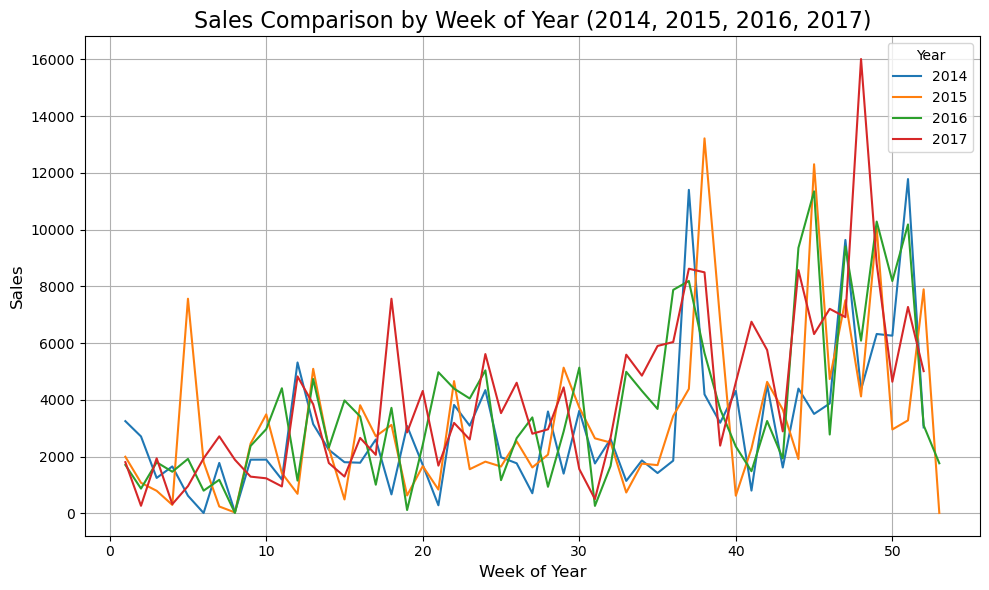

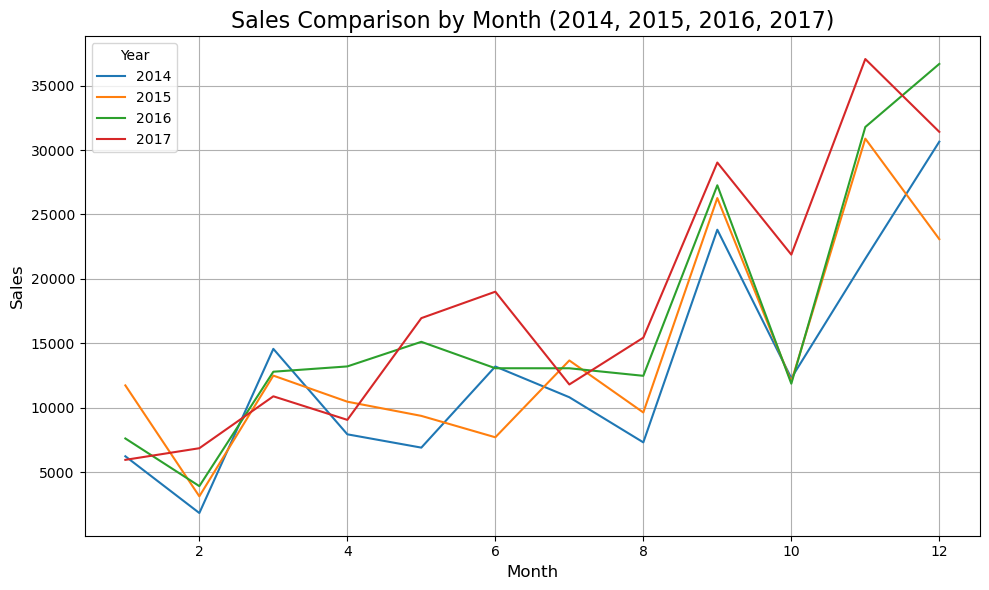

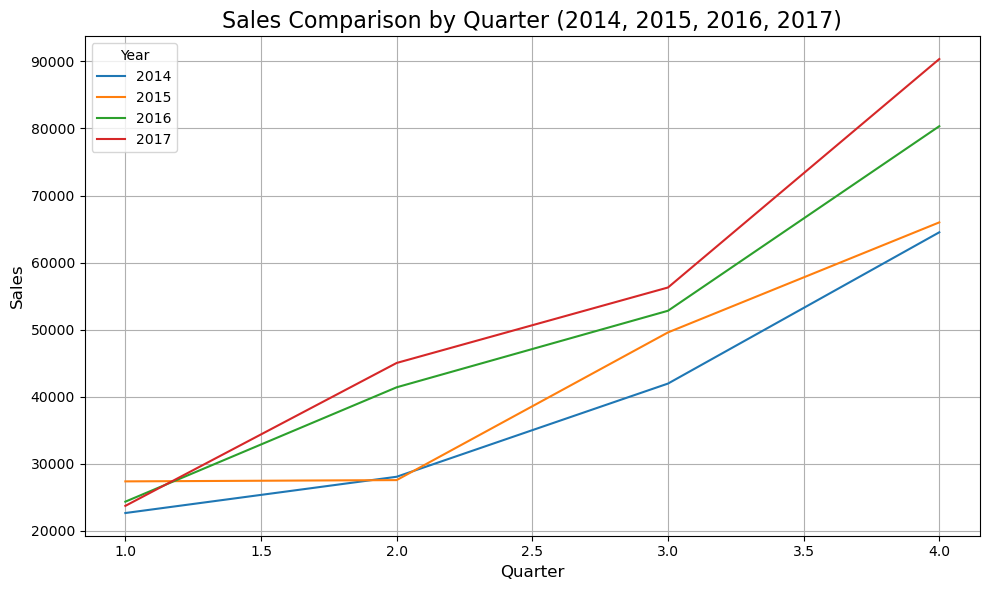

In [9]:
# group the data by 'Order Date' and sum the 'Sales' column
grouped_data = w_store_sales.groupby('Order Date', as_index=False)['Sales'].sum()

# reanme the 'Order Date' column to 'date'
grouped_data = grouped_data.rename(columns={'Order Date': 'date'})


# Plot yearly comparison for Sales on different time units
plot_yearly_comparison(
    df=grouped_data,
    date_col='date',
    value_col='Sales',   
    years=[2014, 2015, 2016,2017],
    time_unit='week',  # weekly comparison
    aggfunc='sum'
)



plot_yearly_comparison(
    df=grouped_data,
    date_col='date',
    value_col='Sales',   
    years=[2014, 2015, 2016,2017],
    time_unit='month', # monthly comparison
    aggfunc='sum'
)


plot_yearly_comparison(
    df=grouped_data,
    date_col='date',
    value_col='Sales',       
    years=[2014,2015,2016,2017],
    time_unit='quarter', #
    aggfunc='sum'
)


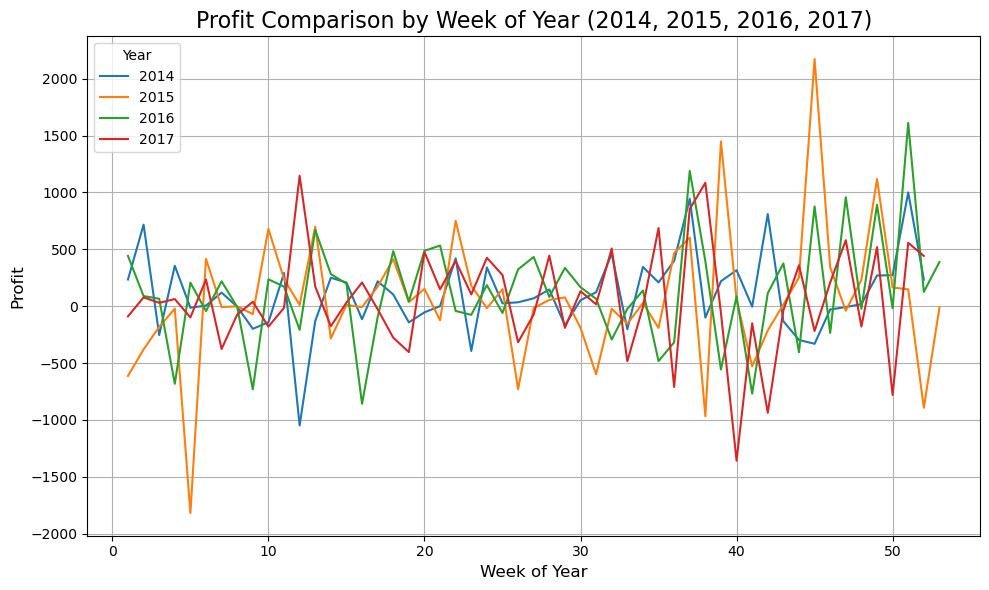

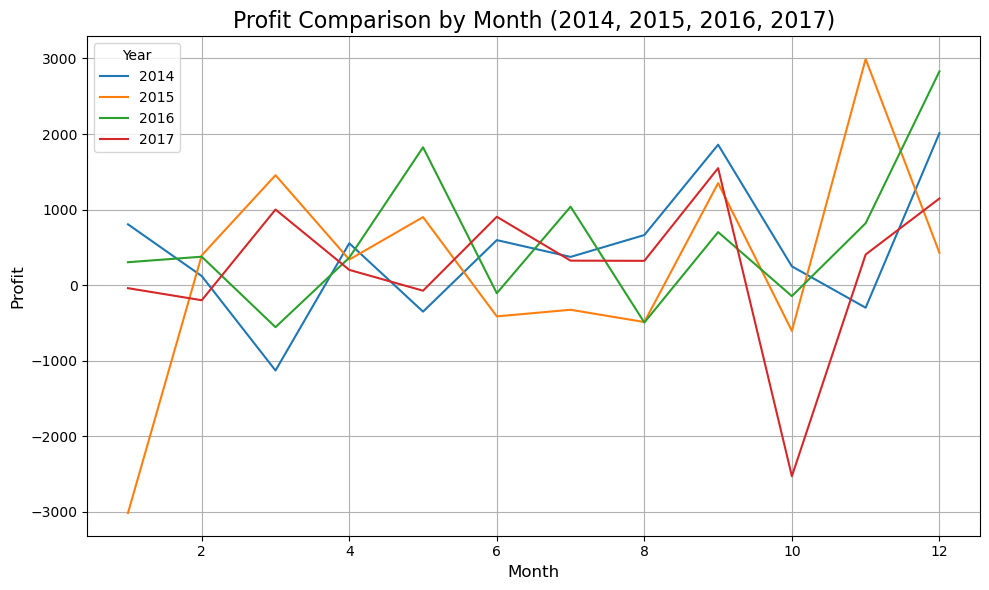

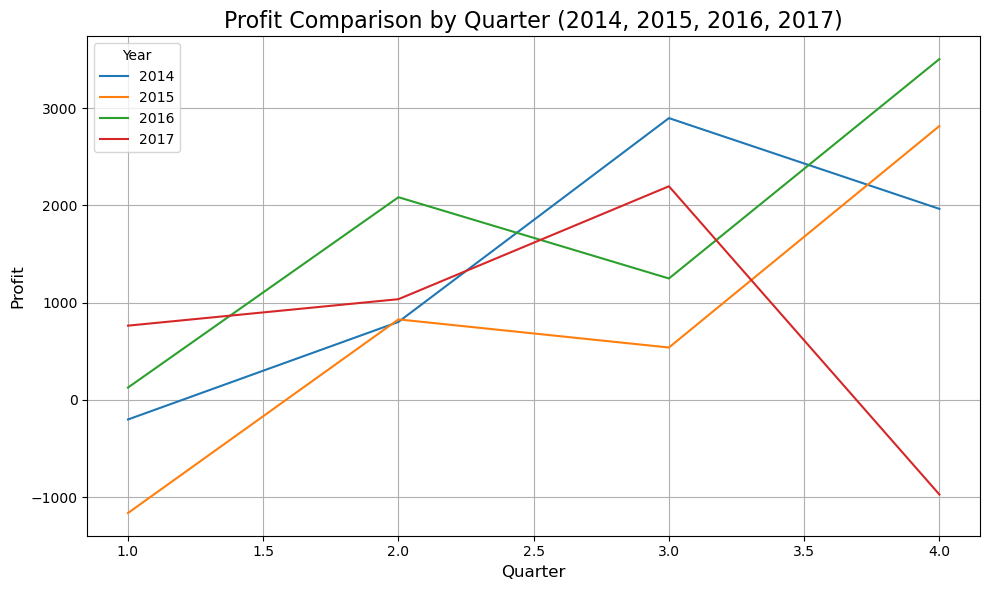

In [10]:
# group the data by 'Order Date' and sum the 'Profit' column
grouped_data = w_store_sales.groupby('Order Date', as_index=False)['Profit'].sum()

# reanme the 'Order Date' column to 'date'
grouped_data = grouped_data.rename(columns={'Order Date': 'date'})


# Plot yearly comparison for Profit on different time units
plot_yearly_comparison(
    df=grouped_data,
    date_col='date',
    value_col='Profit',   
    years=[2014, 2015, 2016,2017],
    time_unit='week',  # weekly comparison
    aggfunc='sum'
)



plot_yearly_comparison(
    df=grouped_data,
    date_col='date',
    value_col='Profit',   
    years=[2014, 2015, 2016,2017],
    time_unit='month', # monthly comparison
    aggfunc='sum'
)


plot_yearly_comparison(
    df=grouped_data,
    date_col='date',
    value_col='Profit',       
    years=[2014,2015,2016,2017],
    time_unit='quarter', #
    aggfunc='sum'
)


Sales is right-skewed, while profit is approximately normally distributed.

d:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


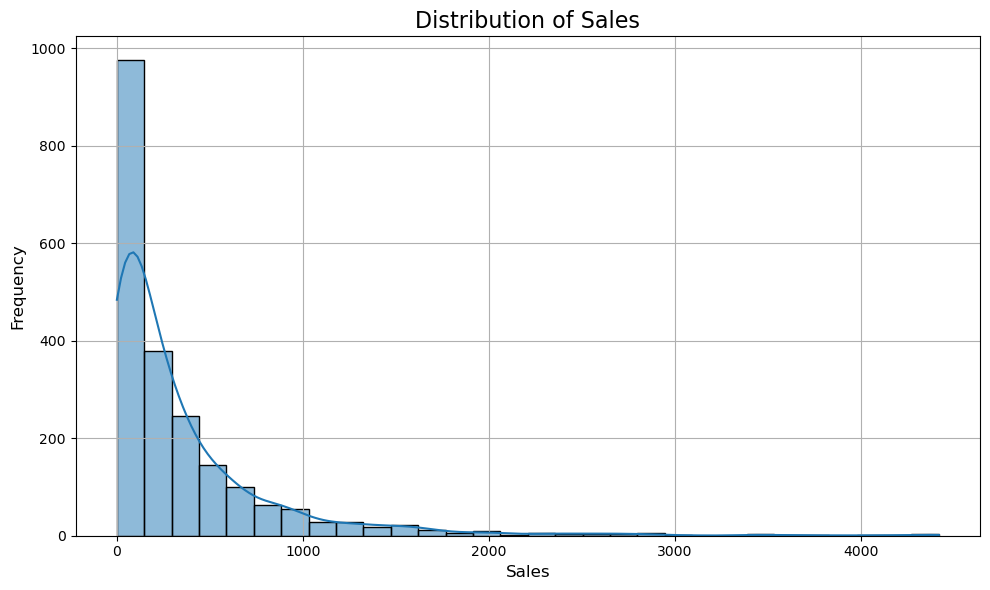

d:\Anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


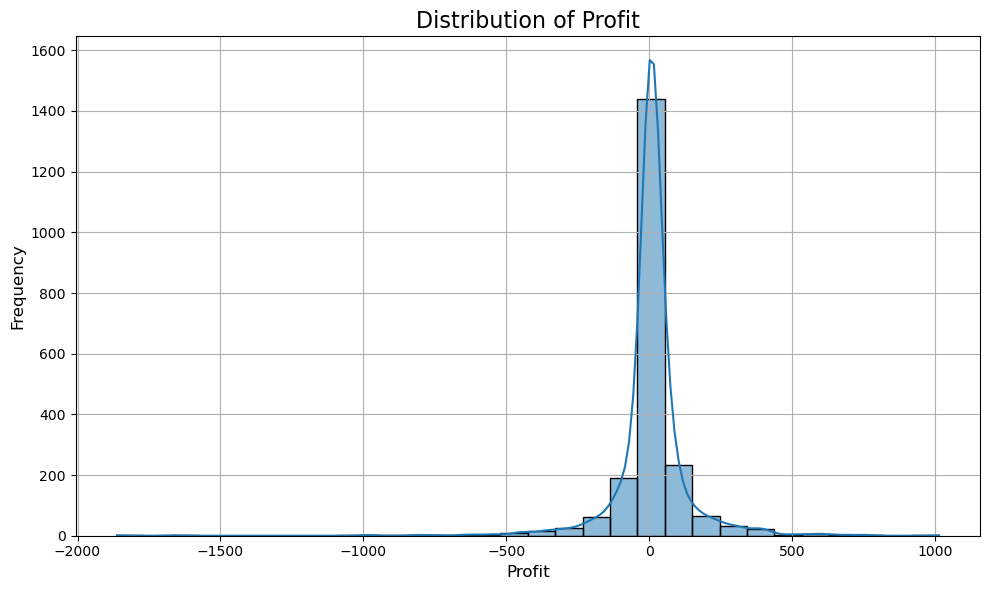

In [11]:
plot_value_distribution(w_store_sales, "Sales", bins=30)
plot_value_distribution(w_store_sales, "Profit", bins=30)

Quantity is right-skewed with most orders between 1 and 5 units, while discounts are heavily concentrated at 0 and 0.2.

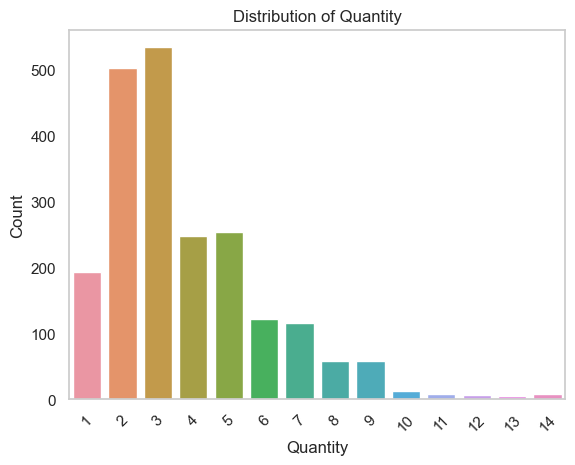

In [46]:
plot_category_distribution(w_store_sales, "Quantity")

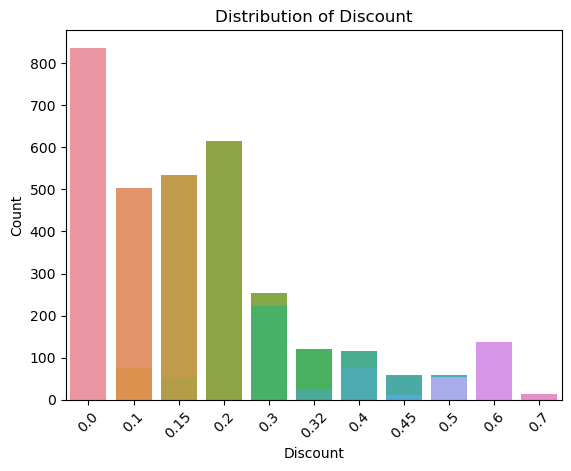

In [ ]:
plot_category_distribution(w_store_sales, "Discount")

## 2. Clean data

### 2.1 Missing data Identification

In [13]:
# Count of missing values per column
missing_count = w_store_sales.isnull().sum()

# Display columns with missing values
missing_columns = missing_count[missing_count > 0].index.tolist()
if missing_columns:
    print("❗ Columns with missing values:", missing_columns)
else:
    print("✅ No missing values found in any column.")

✅ No missing values found in any column.


As this is time series data, it's important to check the effective date resolution. If daily data is sparse, time-based analysis should be performed at an aggregated level.

In [14]:
# define a function to check the integrity of time series data

import pandas as pd

def check_time_integrity(df, date_col, freq='D'):
    """
    Check the integrity of a time series at daily, weekly, or monthly frequency.

    Parameters:
    - df: Input DataFrame
    - date_col: Name of the date column (e.g., 'Order Date')
    - freq: Frequency to check ('D' = daily, 'W' = weekly, 'M' = monthly)

    Returns:
    - Dictionary summarizing date range, duplicates, and missing periods.
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    # Define anchor column based on frequency
    if freq == 'D':
        df['period'] = df[date_col]
        full_range = pd.date_range(start=df['period'].min(), end=df['period'].max(), freq='D')
    elif freq == 'W':
        df['period'] = df[date_col] - pd.to_timedelta(df[date_col].dt.weekday, unit='D')
        full_range = pd.date_range(start=df['period'].min(), end=df['period'].max(), freq='W-MON')
    elif freq == 'M':
        df['period'] = df[date_col].values.astype('datetime64[M]')
        full_range = pd.date_range(start=df['period'].min(), end=df['period'].max(), freq='MS')
    else:
        raise ValueError("Unsupported frequency. Use 'D', 'W', or 'M'.")

    # Check for duplicates and missing periods
    duplicated = df['period'].duplicated().sum()
    missing_periods = set(full_range) - set(df['period'])

    # Print summary
    print(f"📅 {freq} range: {df['period'].min().date()} → {df['period'].max().date()}")
    print(f"📌 Total periods in full range: {len(full_range)}")
    print(f"✅ Recorded periods: {df['period'].nunique()}")
    print(f"❗ Duplicate periods: {duplicated}")
    print(f"🚫 Missing periods: {len(missing_periods)}")

    if missing_periods:
        print(f"Missing period examples: {sorted(list(missing_periods))[:5]} ...")

    return {
        "period_range": (df['period'].min(), df['period'].max()),
        "total_periods": len(full_range),
        "recorded_periods": df['period'].nunique(),
        "duplicate_periods": duplicated,
        "missing_periods": len(missing_periods),
        "missing_period_list": sorted(list(missing_periods))
    }

In [15]:
# Daily
check_time_integrity(df=w_store_sales, date_col='Order Date', freq='D')
print("\n" + "="*50 + "\n")

# Weekly
check_time_integrity(df=w_store_sales, date_col='Order Date', freq='W')
print("\n" + "="*50 + "\n")

# Monthly
check_time_integrity(df=w_store_sales, date_col='Order Date', freq='M')

📅 D range: 2014-01-06 → 2017-12-30
📌 Total periods in full range: 1455
✅ Recorded periods: 889
❗ Duplicate periods: 1232
🚫 Missing periods: 566
Missing period examples: [Timestamp('2014-01-08 00:00:00'), Timestamp('2014-01-09 00:00:00'), Timestamp('2014-01-12 00:00:00'), Timestamp('2014-01-15 00:00:00'), Timestamp('2014-01-17 00:00:00')] ...


📅 W range: 2014-01-06 → 2017-12-25
📌 Total periods in full range: 208
✅ Recorded periods: 208
❗ Duplicate periods: 1913
🚫 Missing periods: 0


📅 M range: 2014-01-01 → 2017-12-01
📌 Total periods in full range: 48
✅ Recorded periods: 48
❗ Duplicate periods: 2073
🚫 Missing periods: 0


{'period_range': (Timestamp('2014-01-01 00:00:00'),
  Timestamp('2017-12-01 00:00:00')),
 'total_periods': 48,
 'recorded_periods': 48,
 'duplicate_periods': 2073,
 'missing_periods': 0,
 'missing_period_list': []}

Although there are no missing values in any column, the daily time series is incomplete. Since the weekly time series is complete, subsequent modeling and visualization are better conducted at the weekly level.

### 2.2 Outliners Identification

This part will primarily focus on numerical variables such as sales and profit, to detect any extreme or unreasonable values—for example, negative sales or profit exceeding sales.

In [16]:
def deteck_weekly_sales_outliers(df, date_col='Order Date', sales_col='Sales', threshold=1.5):
    """
    Detect local outliers in weekly sales using IQR method.
    
    Parameters:
    - df: Input DataFrame
    - date_col: Column name for date (default: 'Order Date')
    - sales_col: Column name for sales (default: 'Sales')
    - threshold: IQR multiplier to define outliers (default: 1.5)
    
    Returns:
    - List of indices of detected outliers
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Create a new column for week start date
    df['week_start'] = df[date_col] - pd.to_timedelta(df[date_col].dt.weekday, unit='D')
    
    # Group by week and calculate weekly sales
    weekly_sales = df.groupby('week_start')[sales_col].sum().reset_index()
    
    # Calculate Q1, Q3, and IQR
    Q1 = weekly_sales[sales_col].quantile(0.25)
    Q3 = weekly_sales[sales_col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Identify outliers
    outlier_idx = weekly_sales[(weekly_sales[sales_col] < lower_bound) | (weekly_sales[sales_col] > upper_bound)].index.tolist()
    
    print(f"\n🔍 Total weekly outliers: {len(outlier_idx)}")
    
    return outlier_idx  

In [17]:
# check the weekly sales outliers
weekly_outliers = deteck_weekly_sales_outliers(w_store_sales)

print(f"Weekly outliers detected at indices: {weekly_outliers}")



🔍 Total weekly outliers: 12
Weekly outliers detected at indices: [35, 45, 49, 88, 95, 99, 147, 148, 150, 152, 154, 203]


In [18]:
def detect_sales_outliers_by_month(df, date_col='Order Date', sales_col='Sales', threshold=2):
    """
    Detect local outliers in sales by month using IQR method.

    Parameters:
    - df: DataFrame with raw transaction data
    - date_col: Name of the datetime column
    - sales_col: Name of the sales value column
    - threshold: IQR multiplier (default 1.5)

    Returns:
    - List of index values identified as monthly outliers
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['month'] = df[date_col].dt.to_period('M')  # Extract month period

    outlier_idx = []

    for month, group in df.groupby('month'):
        Q1 = group[sales_col].quantile(0.25)
        Q3 = group[sales_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR

        month_outliers = group[(group[sales_col] < lower) | (group[sales_col] > upper)]
        outlier_idx.extend(month_outliers.index.tolist())

        print(f"📆 {month}: {len(month_outliers)} outliers")

    print(f"\n🔍 Total monthly outliers: {len(outlier_idx)}")
    return outlier_idx


monthly_outliers = detect_sales_outliers_by_month(w_store_sales)


📆 2014-01: 2 outliers
📆 2014-02: 1 outliers
📆 2014-03: 0 outliers
📆 2014-04: 2 outliers
📆 2014-05: 2 outliers
📆 2014-06: 1 outliers
📆 2014-07: 0 outliers
📆 2014-08: 0 outliers
📆 2014-09: 3 outliers
📆 2014-10: 2 outliers
📆 2014-11: 1 outliers
📆 2014-12: 4 outliers
📆 2015-01: 2 outliers
📆 2015-02: 1 outliers
📆 2015-03: 1 outliers
📆 2015-04: 0 outliers
📆 2015-05: 3 outliers
📆 2015-06: 2 outliers
📆 2015-07: 4 outliers
📆 2015-08: 1 outliers
📆 2015-09: 6 outliers
📆 2015-10: 1 outliers
📆 2015-11: 3 outliers
📆 2015-12: 6 outliers
📆 2016-01: 2 outliers
📆 2016-02: 1 outliers
📆 2016-03: 0 outliers
📆 2016-04: 1 outliers
📆 2016-05: 4 outliers
📆 2016-06: 3 outliers
📆 2016-07: 2 outliers
📆 2016-08: 2 outliers
📆 2016-09: 3 outliers
📆 2016-10: 3 outliers
📆 2016-11: 7 outliers
📆 2016-12: 5 outliers
📆 2017-01: 0 outliers
📆 2017-02: 0 outliers
📆 2017-03: 4 outliers
📆 2017-04: 2 outliers
📆 2017-05: 5 outliers
📆 2017-06: 2 outliers
📆 2017-07: 3 outliers
📆 2017-08: 4 outliers
📆 2017-09: 7 outliers
📆 2017-10:

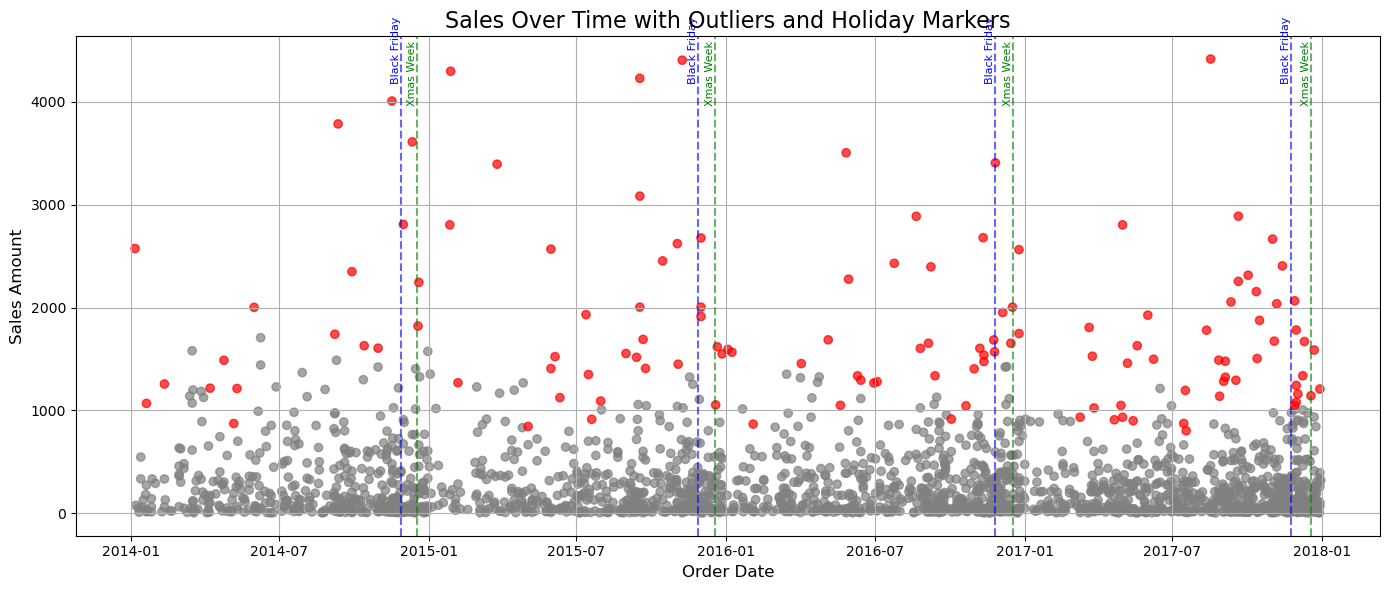

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Add outlier flag column
w_store_sales['is_sales_outlier'] = w_store_sales.index.isin(monthly_outliers)

# Generate Black Friday dates: 4th Thursday of November + 1 day
def get_black_friday(year):
    # All Thursdays in November
    thursdays = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30', freq='W-THU')
    thanksgiving = thursdays[3]  # 4th Thursday
    return thanksgiving + pd.Timedelta(days=1)  # Black Friday

# Generate Christmas week start date (usually Dec 18)
def get_christmas_week_start(year):
    return pd.to_datetime(f'{year}-12-18')

# Collect holiday dates for all years in the data
years = w_store_sales['Order Date'].dt.year.unique()
black_fridays = [get_black_friday(year) for year in years]
christmas_weeks = [get_christmas_week_start(year) for year in years]

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(w_store_sales['Order Date'], w_store_sales['Sales'],
            c=w_store_sales['is_sales_outlier'].map({True: 'red', False: 'gray'}),
            alpha=0.7)

# Add Black Friday markers
for bf in black_fridays:
    plt.axvline(bf, color='blue', linestyle='--', alpha=0.6)
    plt.text(bf, w_store_sales['Sales'].max()*0.95, 'Black Friday', rotation=90,
             color='blue', fontsize=8, ha='right')

# Add Christmas week markers
for cw in christmas_weeks:
    plt.axvline(cw, color='green', linestyle='--', alpha=0.6)
    plt.text(cw, w_store_sales['Sales'].max()*0.9, 'Xmas Week', rotation=90,
             color='green', fontsize=8, ha='right')

plt.title("Sales Over Time with Outliers and Holiday Markers", fontsize=16)
plt.xlabel("Order Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# obtain the top 20 sales orders
top20_sales = w_store_sales.sort_values(by='Sales', ascending=False).head(20)

# abstract the key information from the top 20 sales orders
top20_details = top20_sales[['Order Date', 'Sales', 'Product Name', 'Quantity','Discount']].reset_index(drop=True)

# display the top 20 sales details
print("Top 20 Sales Details:")
print(top20_details)

Top 20 Sales Details:
   Order Date     Sales                                       Product Name  \
0  2017-08-17  4416.174       HON 5400 Series Task Chairs for Big and Tall   
1  2015-11-08  4404.900  Riverside Palais Royal Lawyers Bookcase, Royal...   
2  2015-01-28  4297.644  Chromcraft Bull-Nose Wood Oval Conference Tabl...   
3  2015-09-17  4228.704  Riverside Palais Royal Lawyers Bookcase, Royal...   
4  2014-11-17  4007.840              DMI Eclipse Executive Suite Bookcases   
5  2014-09-12  3785.292       HON 5400 Series Task Chairs for Big and Tall   
6  2014-12-12  3610.848         Bretford Rectangular Conference Table Tops   
7  2016-05-27  3504.900       HON 5400 Series Task Chairs for Big and Tall   
8  2016-11-26  3406.664              DMI Eclipse Executive Suite Bookcases   
9  2015-03-26  3393.680  Bush Advantage Collection Racetrack Conference...   
10 2015-09-17  3083.430  Riverside Palais Royal Lawyers Bookcase, Royal...   
11 2017-09-20  2888.127  Hon 4070 Series P

 Identify rare categories (value count less than 5) in categorical columns

In [21]:
def check_categorical_anomalies(df, min_count=5):
    """
    Identify rare categories in categorical columns.

    Parameters:
    - df: DataFrame
    - min_count: Minimum count threshold to consider a category as normal

    Returns:
    - Dictionary of column names and rare categories
    """
    rare_dict = {}
    cat_cols = df.select_dtypes(include='object').columns

    for col in cat_cols:
        freq = df[col].value_counts()
        rare_vals = freq[freq < min_count].index.tolist()
        if rare_vals:
            rare_dict[col] = rare_vals
            print(f"⚠️ Rare values in '{col}': {rare_vals}")

    if not rare_dict:
        print("✅ No rare category values found.")
    return rare_dict




def check_datetime_anomalies(df, order_col='Order Date', ship_col='Ship Date'):
    """
    Check for invalid datetime patterns like shipping before ordering or future dates.

    Parameters:
    - df: DataFrame
    - order_col: Name of order date column
    - ship_col: Name of ship date column

    Returns:
    - Prints summary of issues
    """
    today = pd.Timestamp.today()

    # Convert if not already
    df[order_col] = pd.to_datetime(df[order_col])
    df[ship_col] = pd.to_datetime(df[ship_col])

    shipping_before_order = df[df[ship_col] < df[order_col]]
    future_orders = df[df[order_col] > today]

    print(f"🚫 Ship Date before Order Date: {len(shipping_before_order)} records")
    print(f"🚫 Orders dated in the future: {len(future_orders)} records")

    return {
        "ship_before_order": shipping_before_order.index.tolist(),
        "future_orders": future_orders.index.tolist()
    }

In [22]:
check_categorical_anomalies(w_store_sales)
check_datetime_anomalies(w_store_sales, order_col='Order Date', ship_col='Ship Date')

⚠️ Rare values in 'Row ID': ['1', '6714', '6783', '6780', '6779', '6768', '6766', '6762', '6757', '6756', '6751', '6743', '6741', '6731', '6729', '6719', '6713', '6926', '6710', '6709', '6702', '6700', '6686', '6684', '6679', '6674', '6667', '6664', '6660', '6659', '6654', '6652', '6785', '6788', '6792', '6796', '6911', '6909', '6899', '6894', '6885', '6882', '6880', '6878', '6877', '6869', '6863', '6851', '6850', '6846', '6845', '6837', '6834', '6825', '6822', '6821', '6820', '6816', '6814', '6812', '6809', '6804', '6800', '6799', '6797', '6647', '6640', '6632', '6491', '6482', '6475', '6470', '6465', '6463', '6456', '6447', '6445', '6440', '6439', '6436', '6433', '6431', '6424', '6420', '6408', '6406', '6404', '6402', '6395', '6382', '6378', '6375', '6372', '6371', '6370', '6351', '6340', '6337', '6484', '6492', '6631', '6498', '6626', '6625', '6623', '6622', '6616', '6615', '6612', '6608', '6602', '6600', '6588', '6586', '6582', '6577', '6570', '6566', '6564', '6559', '6551', '6550'

{'ship_before_order': [], 'future_orders': []}

### 2.3 non-significant features

First, by checking the number of unique values in each categorical feature, we can preliminarily identify which features have little modeling value.

In [23]:
# Check unique values in object (categorical) columns
categorical_cols = w_store_sales.select_dtypes(include='object').columns

print("Unique value count for categorical columns:\n")
for col in categorical_cols:
    print(f"{col}: {w_store_sales[col].nunique()}")

Unique value count for categorical columns:

Row ID: 2121
Order ID: 1764
Ship Mode: 4
Customer ID: 707
Customer Name: 707
Segment: 3
Country: 1
City: 371
State: 48
Postal Code: 454
Region: 4
Product ID: 375
Category: 1
Sub-Category: 4
Product Name: 380


From a modeling perspective, the following types of variables are not suitable as model inputs:

--- Pure identifiers or high-cardinality columns: such as **Row ID, Order ID, Customer ID, Customer Name, Product ID, Product Name, Postal Code, and City**.  
These columns have little to no variability or are too high in cardinality, making them unsuitable for modeling.

--- **State** Although State has only 48 categories and provides useful geographic information, using one-hot encoding would result in too many features relative to the number of records (just over 200) when modeling weekly sales data.

--- Constant columns: such as **Country** and **Category**, which contain only one unique value and provide no variability or predictive power. These should be removed.  

### **2.4 Convert data types of columns to be numberical**

According to the analysis in Section 2.3, the following categorical variables are worth retaining:  

**Segment**: Contains 3 categories (e.g., Consumer, Corporate, Home Office) that distinguish customer types.  
**Region**: Contains 4 categories (East, West, Central, South), representing broad geographic areas.  
**Sub-Category**: Contains 4 product-level categories that can support sales forecasting.  
**Ship Mode**: Contains 4 shipping types, reflecting delivery speed or cost, which may affect customer behavior and sales.  

In [24]:
# Make a copy of the original dataset to preserve raw data
df_encoded = w_store_sales.copy()

# Specify the categorical columns to encode
one_hot_cols = ['Segment', 'Region', 'Ship Mode','Sub-Category']

# 🔧 Perform one-hot encoding (keep all categories, don't drop first)
dummies = pd.get_dummies(df_encoded[one_hot_cols], 
                         drop_first=False, 
                         prefix_sep='_', 
                         dtype=int)

# Concatenate the dummy variables back to the original DataFrame
# This retains the original categorical columns
df_encoded = pd.concat([df_encoded, dummies], axis=1)

# Define high-cardinality, identifier, or constant columns to drop
columns_to_drop = [
    'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 
    'Postal Code', 'Product ID', 'Product Name', 'Category', 
    'State', 'City', 'Country'
]

# Drop the specified unnecessary columns
df_encoded.drop(columns=columns_to_drop, inplace=True)
print("🗑️ Dropped columns:", columns_to_drop)

# Display the new shape of the DataFrame after column drop
print("New shape after dropping columns:", df_encoded.shape)


🗑️ Dropped columns: ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name', 'Category', 'State', 'City', 'Country']
New shape after dropping columns: (2121, 26)


## 3. Visualise data

### 3.1 Category Distribution of Categorical Variables

Standard Class is the most common shipping method, while Same Day is rarely used.   
Consumer is the dominant customer segment, indicating sales are mainly from individual buyers.    
Orders are relatively higher in the West and East regions..  
Furnishings and Chairs are the best-selling sub-categories, whereas Bookcases and Tables are less popular.  

Alse, these distributions show that the dataset is imbalanced across certain categories, which may impact model training and need consideration during modeling (e.g., stratified sampling or weighting).

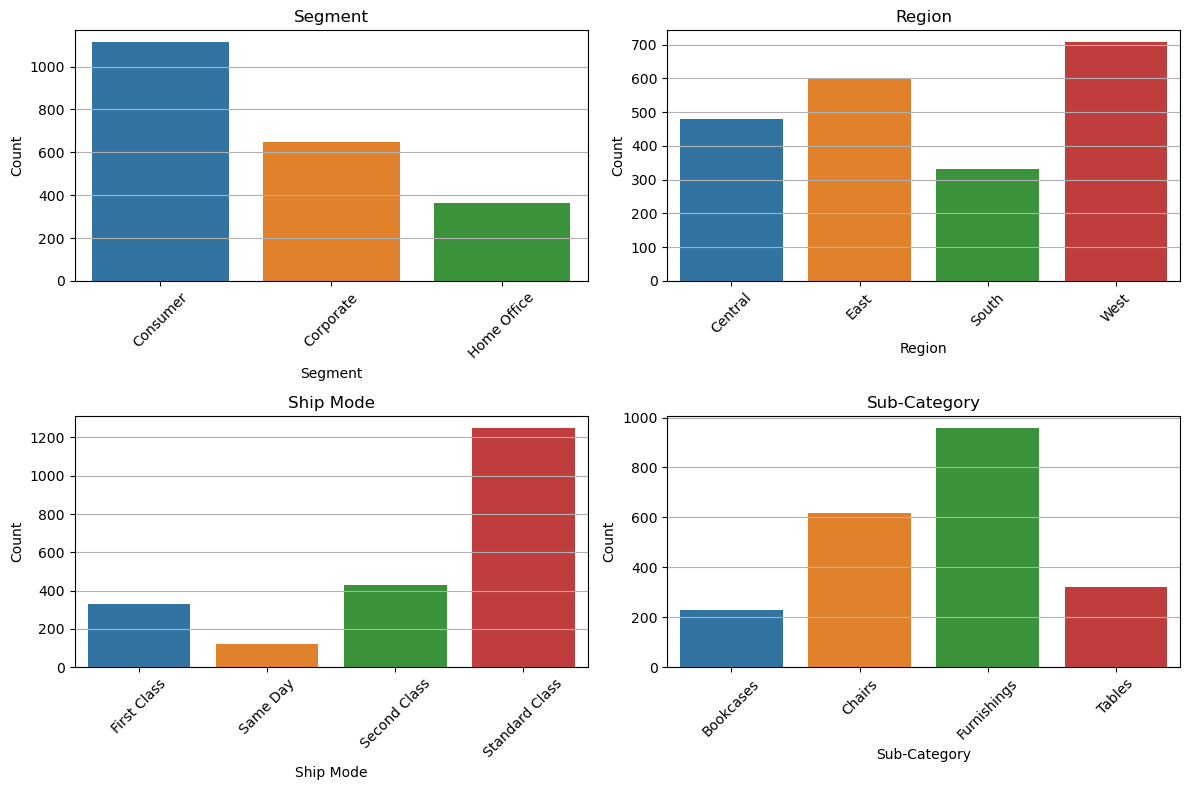

In [25]:
# Number of plots per row
cols_per_row = 2

# Total number of plots
n_plots = len(one_hot_cols)
n_rows = (n_plots + cols_per_row - 1) // cols_per_row  # round up

# Create subplots
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(one_hot_cols):
    ax = axes[i]
    plot_category_distribution(w_store_sales, column, ax=ax)
    ax.set_title(column)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### 3.2 Sales and Profit Distribution by Categorical Variables

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_profit_boxplots(df, categorical_col):
    """
    Plot side-by-side boxplots to compare Sales and Profit distributions 
    across categories of a given categorical variable.

    Parameters:
    - df: The DataFrame containing the data
    - categorical_col: The name of the categorical column (x-axis)
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

    # Sales boxplot
    sns.boxplot(data=df, x=categorical_col, y='Sales', ax=axes[0])
    axes[0].set_title(f"Sales Distribution by {categorical_col}", fontsize=14)
    axes[0].set_xlabel(categorical_col)
    axes[0].set_ylabel("Sales")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, axis='y')

    # Profit boxplot
    sns.boxplot(data=df, x=categorical_col, y='Profit', ax=axes[1])
    axes[1].set_title(f"Profit Distribution by {categorical_col}", fontsize=14)
    axes[1].set_xlabel(categorical_col)
    axes[1].set_ylabel("Profit")
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, axis='y')

    plt.tight_layout()
    plt.show()


Plots show clear differences in sales and profit distributions across customer segments, regions, shipping modes, and sub-categories.

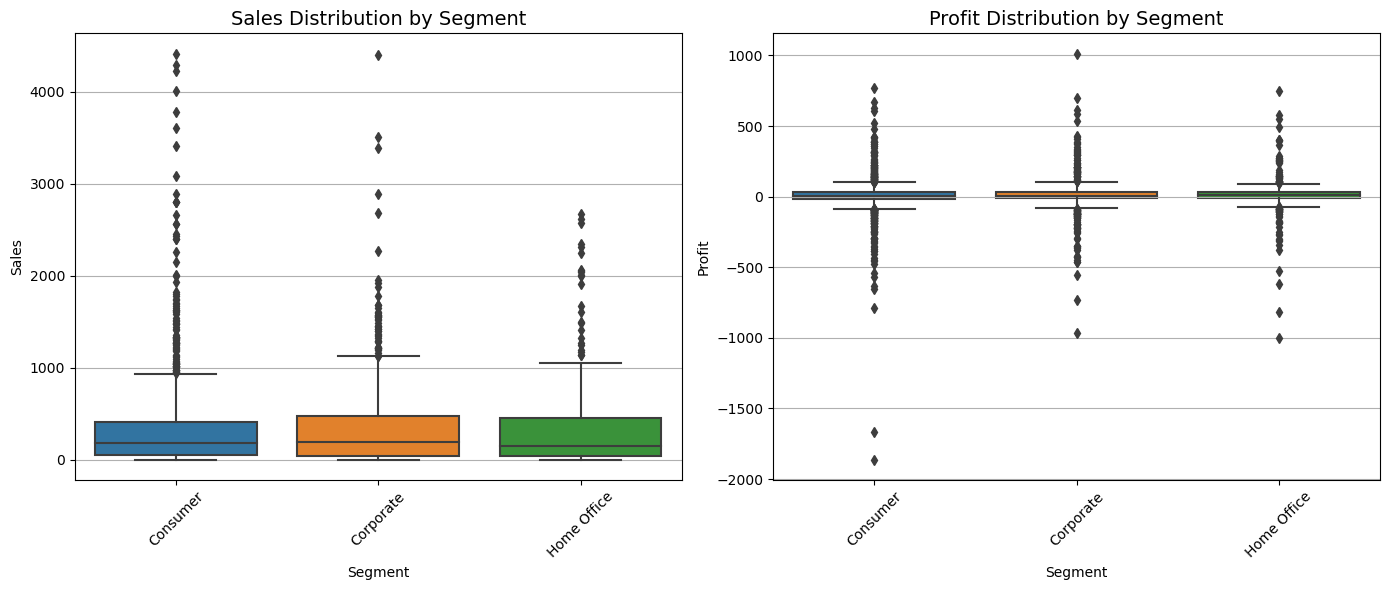

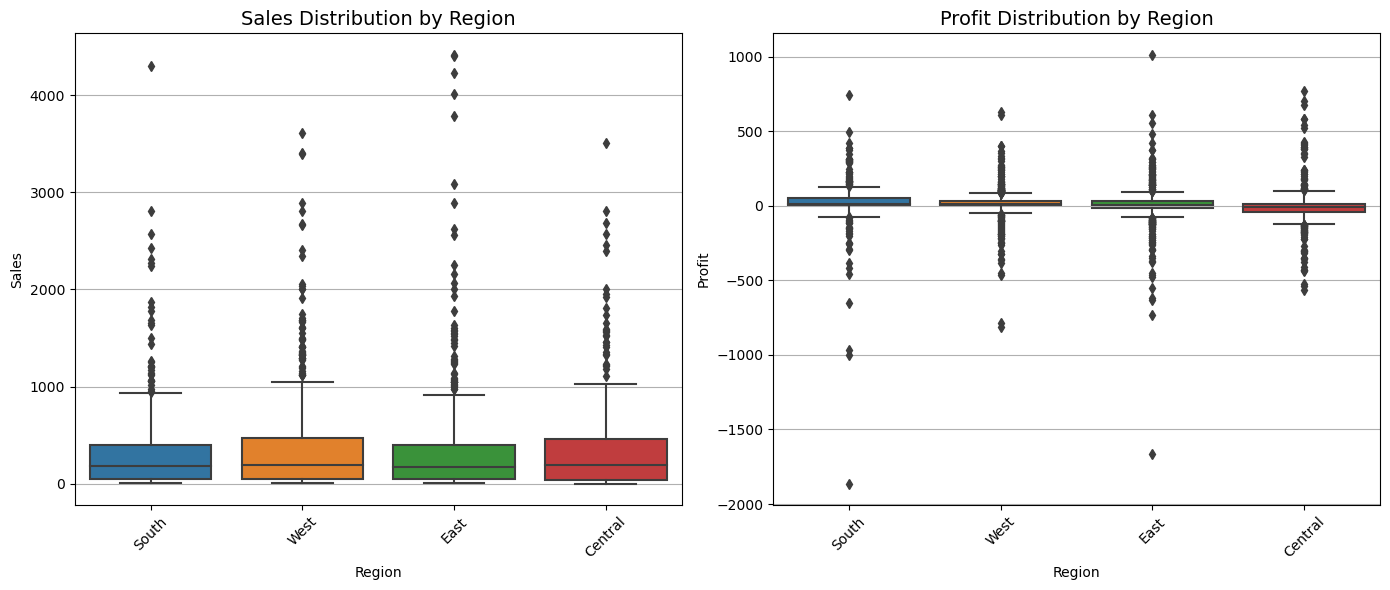

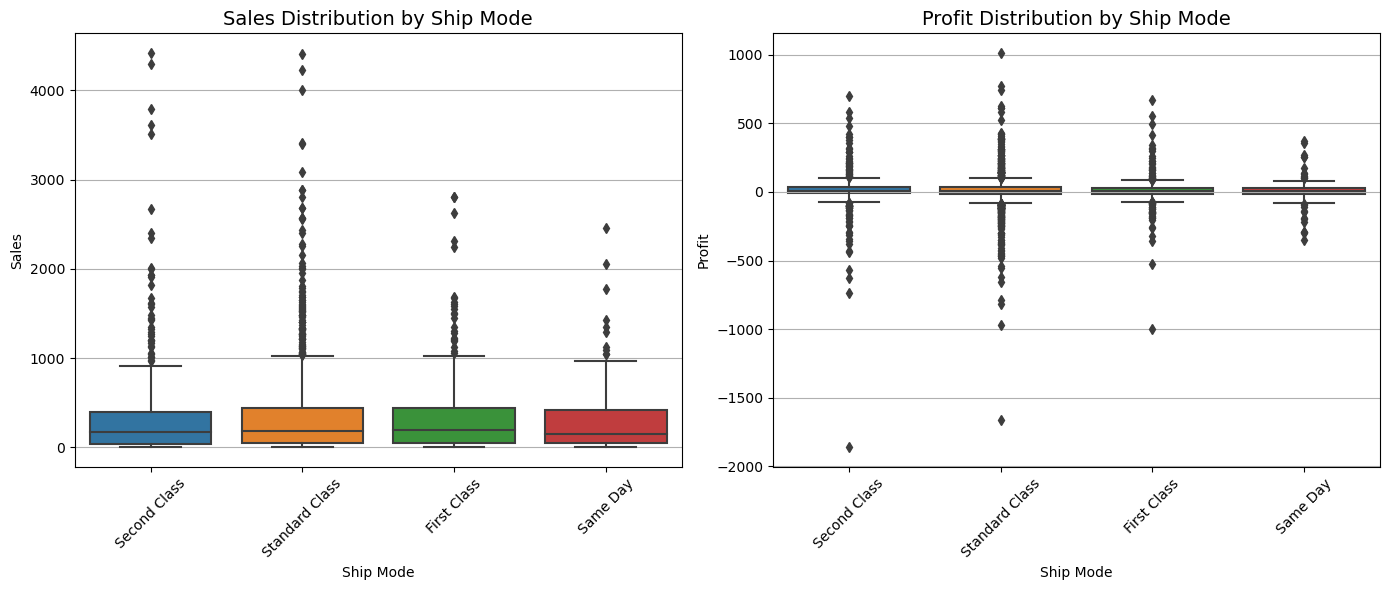

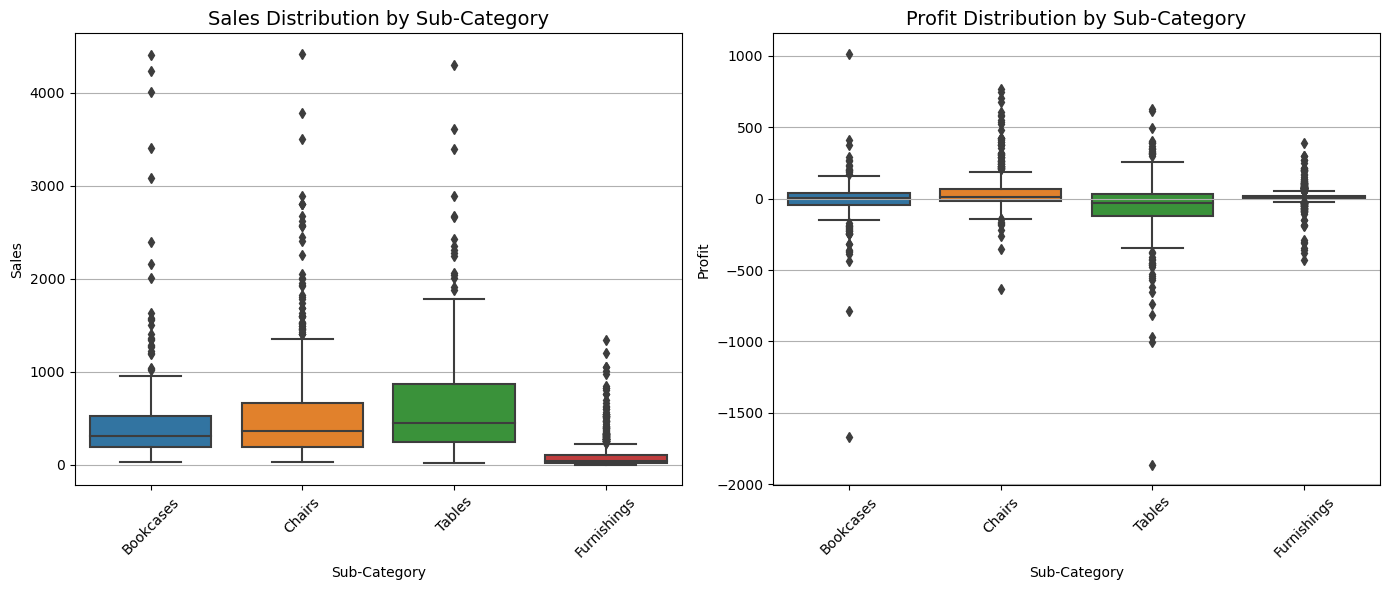

In [27]:
plot_sales_profit_boxplots(w_store_sales, 'Segment')

plot_sales_profit_boxplots(w_store_sales, 'Region')

plot_sales_profit_boxplots(w_store_sales, 'Ship Mode')

plot_sales_profit_boxplots(w_store_sales, 'Sub-Category')

The plot below shows that daily average sales across different segments, regions, and shipping modes are all close to the overall mean (around 350), suggesting consistent order values across categories. However, average profit varies significantly, with some categories (e.g., South region, Corporate segment, Second Class shipping) being much more profitable than others, and even negative in some cases (e.g., Central region).

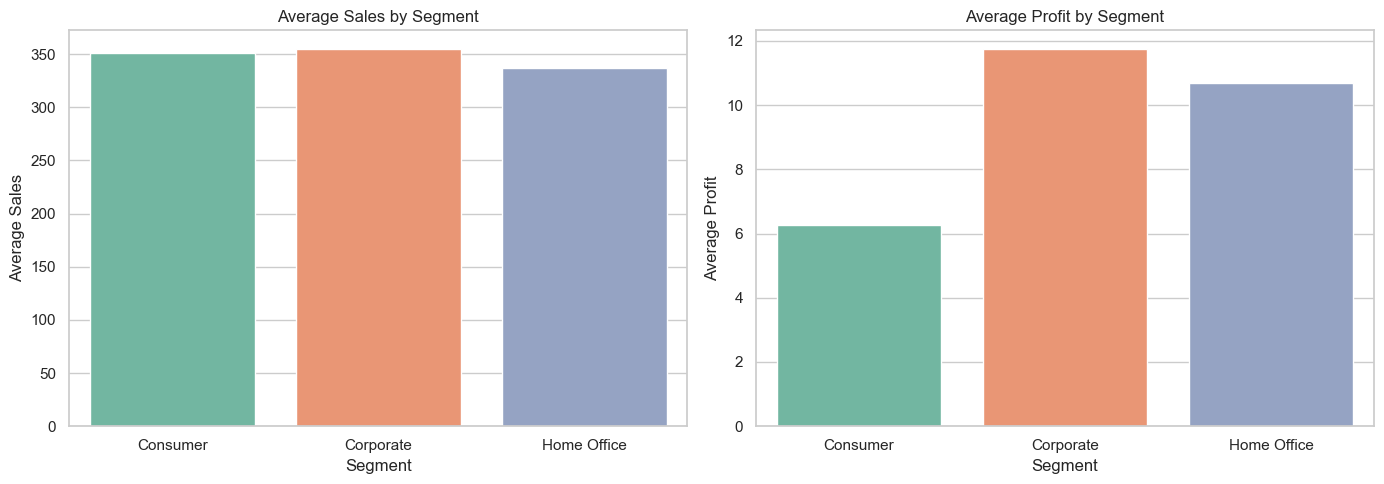

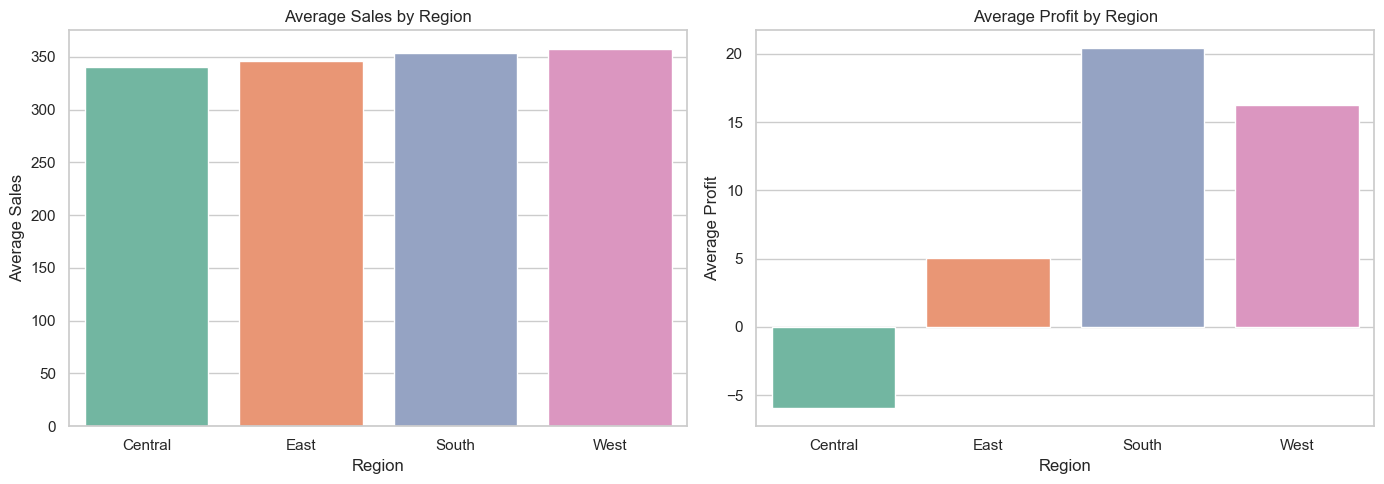

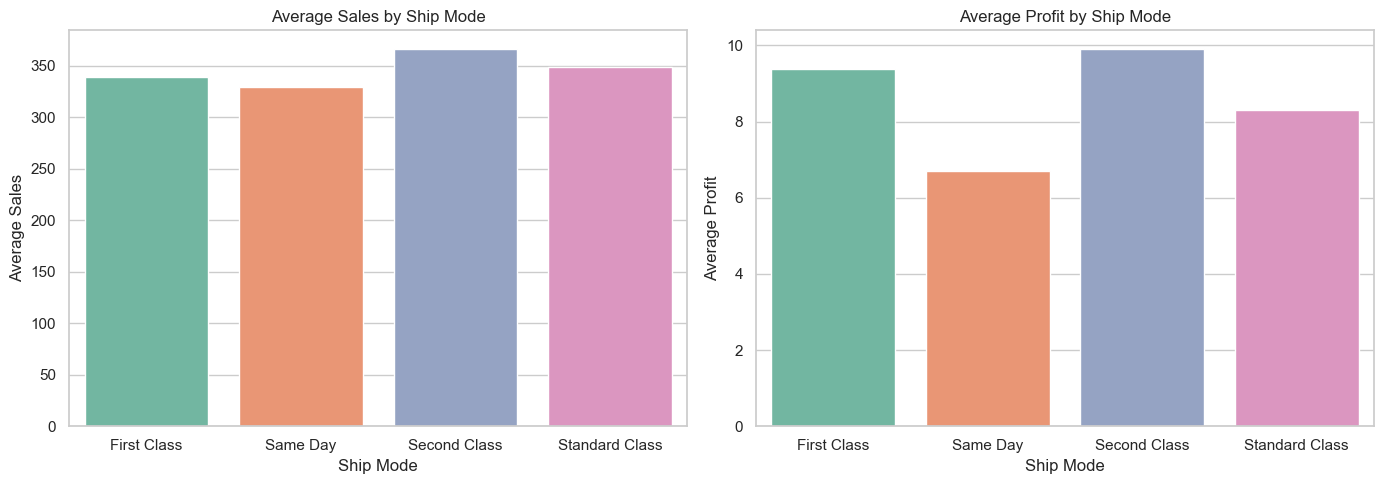

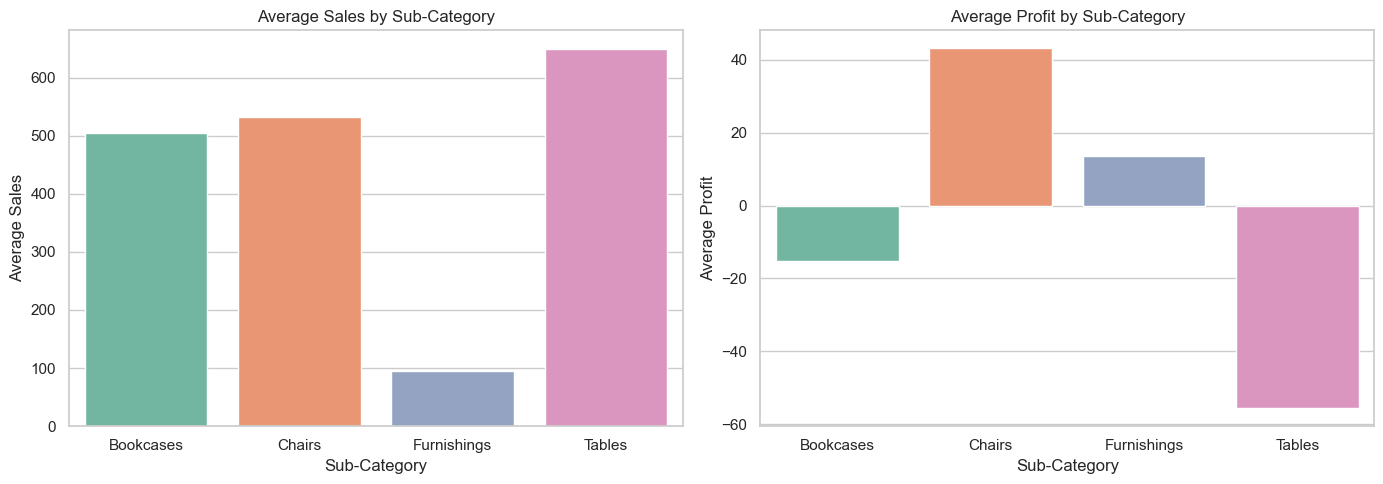

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grouped_mean_barplots(df, group_col, value_cols=['Sales', 'Profit'], 
                                palette='Set2', figsize=(14, 5), suptitle=None):
    """
    Plot multiple bar charts (in one row) showing mean values of given columns grouped by a categorical column.

    Parameters:
    - df: pandas DataFrame
    - group_col: name of the categorical column to group by (string)
    - value_cols: list of numeric column names to plot (list of strings)
    - palette: seaborn color palette
    - figsize: overall figure size
    - suptitle: overall title for the plot grid (optional)
    """
    sns.set(style="whitegrid")
    
    num_plots = len(value_cols)
    fig, axes = plt.subplots(1, num_plots, figsize=figsize)
    
    for i, val_col in enumerate(value_cols):
        grouped = df.groupby(group_col)[val_col].mean().reset_index()
        sns.barplot(data=grouped, x=group_col, y=val_col, palette=palette, ax=axes[i])
        axes[i].set_title(f'Average {val_col} by {group_col}')
        axes[i].set_xlabel(group_col)
        axes[i].set_ylabel(f'Average {val_col}')
    
    if suptitle:
        fig.suptitle(suptitle, fontsize=14)
        
    plt.tight_layout()
    plt.show()

plot_grouped_mean_barplots(df_encoded,group_col='Segment')
plot_grouped_mean_barplots(df_encoded, group_col='Region')
plot_grouped_mean_barplots(df_encoded, group_col='Ship Mode')
plot_grouped_mean_barplots(df_encoded, group_col='Sub-Category')

## 4. Identify correlated variables

The analysis was based on weekly sales.   

I first examined the relationship between each categorical variable and weekly sales to assess their modeling value. 

Then, STL decomposition and ACF/PACF analysis were performed to construct time-based features and evaluate their correlations.

In [29]:
# aggregate the data to the weekly level to analyze relationships across sub-categories.
# 'discount' is a ratio, so we need to recalculate it after aggregation.

# 1. Estimate original price
df_encoded['original_price'] = df_encoded['Sales'] / (1 - df_encoded['Discount'])

# 2. Add year-week key
df_encoded['year_week'] = df_encoded['Order Date'].dt.strftime('%Y-%U')

# 3. Identify aggregation strategies
agg_dict = {}

for col in df_encoded.select_dtypes(include='number').columns:
    if col in ['Sales', 'Profit', 'Quantity', 'original_price']:
        agg_dict[col] = 'sum'
    elif col == 'Discount':
        continue  # We'll recalculate it later
    else:
        agg_dict[col] = 'sum'  # one-hot or binary columns

# Add Order Date min (first day of week)
agg_dict['Order Date'] = 'min'

# 4. Perform aggregation
df_encoded_weekly = df_encoded.groupby('year_week').agg(agg_dict).reset_index()
df_encoded_weekly.rename(columns={'Order Date': 'Week Start Date'}, inplace=True)

# 5. Recalculate weekly discount
df_encoded_weekly['Discount'] = 1 - (df_encoded_weekly['Sales'] / df_encoded_weekly['original_price'])

# 6. Round for readability (optional)
df_encoded_weekly['Discount'] = df_encoded_weekly['Discount'].round(4)

print("Aggregated Weekly Data:")
print(df_encoded_weekly.head())

Aggregated Weekly Data:
  year_week     Sales  Quantity    Profit  Segment_Consumer  \
0   2014-01  2712.428        15  717.0750                 2   
1   2014-02  1069.003        19   66.5926                 3   
2   2014-03  1620.228        23  -39.9725                 7   
3   2014-04   840.866        13   61.7714                 2   
4   2014-05    14.560         2    5.5328                 0   

   Segment_Corporate  Segment_Home Office  Region_Central  Region_East  \
0                  1                    1               1            1   
1                  1                    0               0            2   
2                  0                    0               2            0   
3                  1                    2               1            0   
4                  0                    1               0            0   

   Region_South  ...  Ship Mode_Same Day  Ship Mode_Second Class  \
0             2  ...                   0                       0   
1             1 

### 4.1 Analysis of Relationships with Categorical Variables

The average weekly sales across different segments, regions, and shipping modes are all close to the overall mean (around 3500-4000), suggesting consistent order values across categories. 

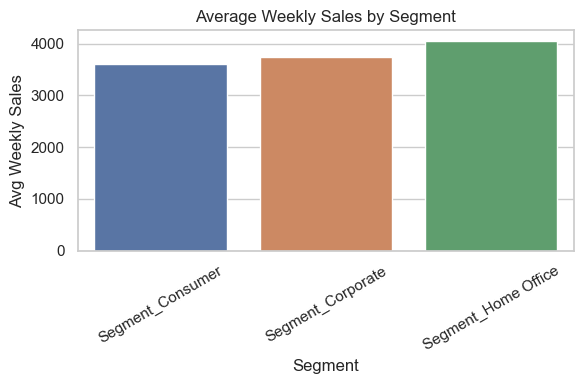

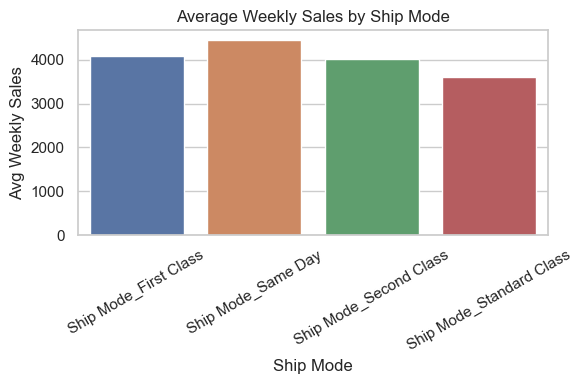

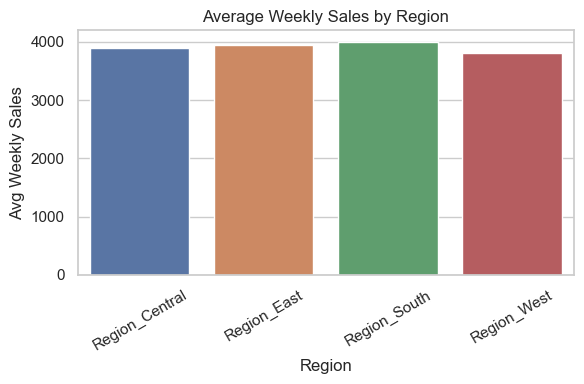

In [30]:
# Define function to plot average weekly sales by any one-hot encoded categorical prefix
def plot_avg_sales_by_category(df, category_prefix='Segment_'):
    """
    Plot average weekly sales by a given one-hot encoded categorical group.
    
    Parameters:
        df (pd.DataFrame): Aggregated weekly dataframe with one-hot category columns and 'Sales'.
        category_prefix (str): Prefix of one-hot columns (e.g., 'Segment_', 'Region_', 'Ship Mode_')
    """
    category_cols = [col for col in df.columns if col.startswith(category_prefix)]
    if not category_cols:
        print(f"No columns found with prefix '{category_prefix}'")
        return

    # Reshape to long format
    melted = df.melt(id_vars=['Sales'], value_vars=category_cols,
                     var_name='Category', value_name='Count')
    
    # Filter out rows where the category is not present in that week
    melted = melted[melted['Count'] > 0]

    # Compute average weekly sales per category
    avg_sales = melted.groupby('Category')['Sales'].mean().reset_index()

    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Category', y='Sales', data=avg_sales)
    plt.title(f"Average Weekly Sales by {category_prefix.rstrip('_')}")
    plt.ylabel("Avg Weekly Sales")
    plt.xlabel(category_prefix.rstrip('_'))
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# Example call for segment
plot_avg_sales_by_category(df_encoded_weekly, category_prefix='Segment_')
plot_avg_sales_by_category(df_encoded_weekly, category_prefix='Ship Mode_')
plot_avg_sales_by_category(df_encoded_weekly, category_prefix='Region_')


**Create a heatmap to to assess how discounts correlate with sales and profit across categories.**  

The analysis confirms that while discounts consistently reduce profit, they don’t always boost sales.  

The strong negative correlation suggests that if we aim to predict profit, we can engineer new features by interacting Discount with categorical variables (e.g., Sub-Category, Region, etc.).
These interaction features can help the model capture how discount effects vary across different categories, potentially improving predictive performance.

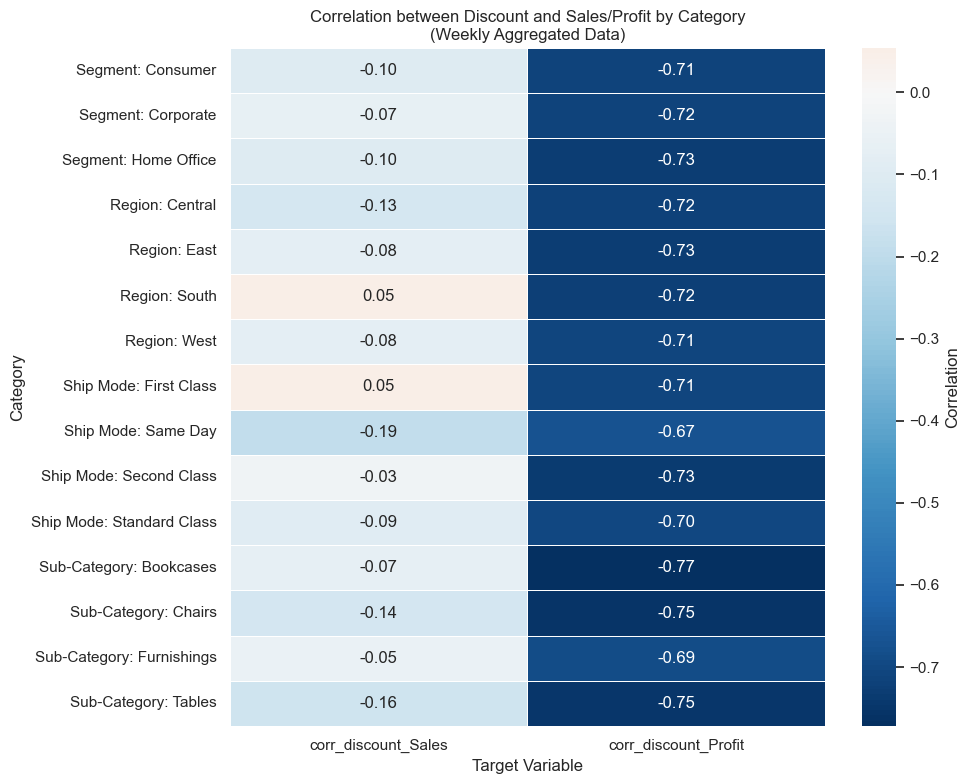

Heatmap Summary:
Data shape: (15, 2)

Correlation ranges:
corr_discount_Sales: -0.19 to 0.05
corr_discount_Profit: -0.77 to -0.67


In [31]:
# Create a heatmap to assess how discounts correlate with sales and profit across categories
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def compute_discount_correlations_for_all(df, group_cols, value_cols):
    """
    Compute correlations between discount and target variables (Sales/Profit) 
    for different categorical groups.
    """
    result_frames = []
    
    for group_col in group_cols:
        # Get one-hot encoded columns for this category
        category_cols = [col for col in df.columns if col.startswith(group_col)]
        
        if not category_cols:
            continue
            
        temp = []
        for val_col in value_cols:
            corr_data = []
            
            # For each subcategory within this group
            for cat_col in category_cols:
                # Filter weeks where this category has sales
                mask = df[cat_col] > 0
                if mask.sum() < 3:  # Need at least 3 data points
                    continue
                    
                subset = df[mask]
                if len(subset) > 0 and subset['Discount'].var() > 0:
                    corr_val = subset[['Discount', val_col]].corr().iloc[0, 1]
                    corr_data.append({
                        'Category': cat_col.replace(group_col, '').replace('_', ''),
                        f'corr_discount_{val_col}': corr_val
                    })
            
            if corr_data:
                corr_df = pd.DataFrame(corr_data)
                corr_df.set_index('Category', inplace=True)
                temp.append(corr_df)
        
        if temp:
            group_df = pd.concat(temp, axis=1)
            group_df.index = [f"{group_col.rstrip('_')}: {idx}" for idx in group_df.index]
            result_frames.append(group_df)
    
    return pd.concat(result_frames) if result_frames else pd.DataFrame()

# Define the categorical groups and target variables
group_prefixes = ['Segment_', 'Region_', 'Ship Mode_', 'Sub-Category_']
target_vars = ['Sales', 'Profit']

# Compute correlations
heatmap_df = compute_discount_correlations_for_all(df_encoded_weekly, group_prefixes, target_vars)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="RdBu_r", center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title("Correlation between Discount and Sales/Profit by Category\n(Weekly Aggregated Data)")
plt.xlabel("Target Variable")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

print("Heatmap Summary:")
print(f"Data shape: {heatmap_df.shape}")
print("\nCorrelation ranges:")
for col in heatmap_df.columns:
    print(f"{col}: {heatmap_df[col].min():.2f} to {heatmap_df[col].max():.2f}")

**Creat a regression line to show the relation between Discount and Porfit**  
The regression line shows a clear negative correlation: as discount increases, profit tends to decrease. High discounts (above 0.4) often lead to negative profits, indicating that aggressive discounting may harm profitability.

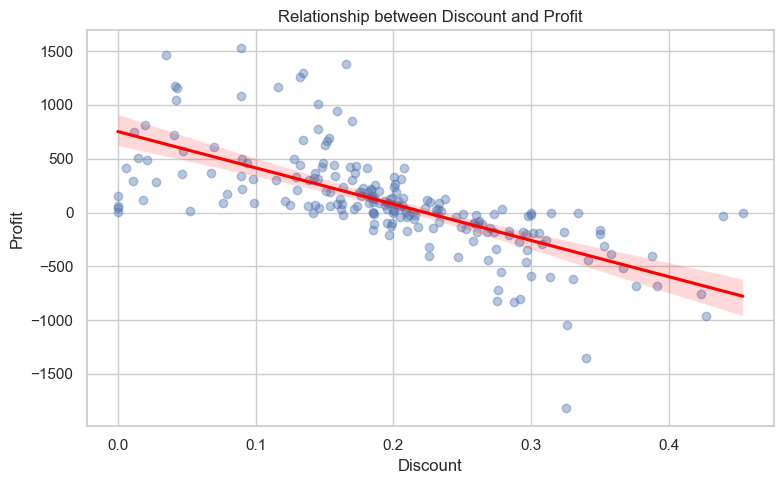

In [32]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df_encoded_weekly, x='Discount', y='Profit', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


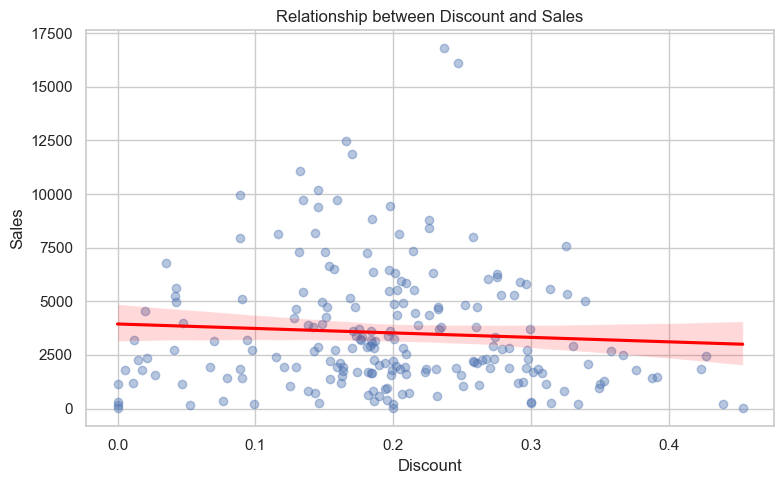

In [33]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df_encoded_weekly, x='Discount', y='Sales', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [34]:
df_encoded_weekly

,year_week,Sales,Quantity,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,...,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,original_price,Week Start Date,Discount
0,2014-01,2712.4280,15,717.0750,2,1,1,1,1,2,...,0,0,3,0,1,3,0,2827.52,2014-01-06,0.0407
1,2014-02,1069.0030,19,66.5926,3,1,0,0,2,1,...,0,2,1,2,1,1,0,1221.68,2014-01-13,0.1250
2,2014-03,1620.2280,23,-39.9725,7,0,0,2,0,3,...,0,1,5,1,1,5,0,2049.97,2014-01-19,0.2096
3,2014-04,840.8660,13,61.7714,2,1,2,1,0,2,...,0,0,3,2,0,2,1,975.41,2014-01-26,0.1379
4,2014-05,14.5600,2,5.5328,0,0,1,0,0,0,...,0,0,0,0,0,1,0,14.56,2014-02-08,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2017-48,16791.9320,155,127.4067,13,6,13,7,12,4,...,0,3,22,2,10,17,3,22011.97,2017-11-26,0.2371
206,2017-49,7283.9800,112,443.6068,16,8,4,4,12,1,...,1,7,15,3,7,15,3,8391.11,2017-12-03,0.1319
207,2017-50,6112.8230,66,-722.6819,11,7,4,6,5,4,...,4,4,11,1,5,12,4,8438.33,2017-12-10,0.2756
208,2017-51,6509.8090,69,442.7614,13,3,3,5,6,4,...,1,3,13,3,4,8,4,7723.25,2017-12-17,0.1571



**Analysis of the Relationship Between Categorical Variables and Sales/Profit**  
Many one-hot encoded category variables demonstrate strong positive correlations with weekly sales, especially variables like Sub-Category_Chairs, and Ship Mode_Standard Class, all exceeding 0.70.  
This suggests that these categories are highly predictive of sales behavior and should be retained as important features in modeling tasks.  

On the other hand, correlations with profit are generally weaker.

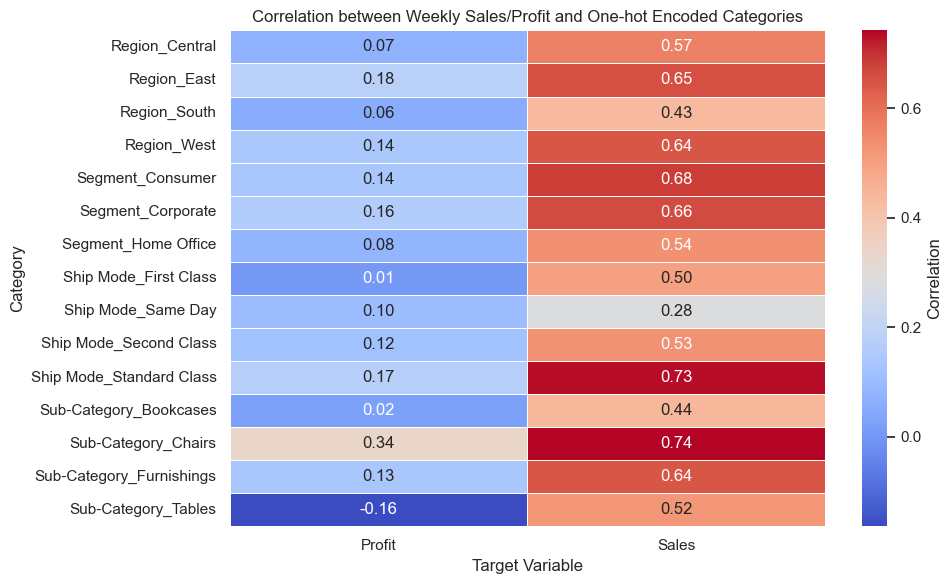

In [35]:
# Step 1: Define common one-hot prefixes based on your data
prefixes = ['Segment_', 'Region_', 'Ship Mode_', 'Sub-Category_']

# Step 2: Select only one-hot weekly columns by prefix
one_hot_cols = [col for col in df_encoded_weekly.columns if any(col.startswith(p) for p in prefixes)]

# Step 3: Compute correlation matrix between one-hot weekly features and Sales/Profit
corr_matrix = df_encoded_weekly[one_hot_cols + ['Sales', 'Profit']].corr()

# Step 4: Extract relevant correlation values (one-hot vs targets)
heatmap_data = corr_matrix.loc[one_hot_cols, ['Sales', 'Profit']]

# Step 5: Reshape for heatmap
heatmap_df = heatmap_data.reset_index().melt(id_vars='index', var_name='Target Variable', value_name='Correlation')
heatmap_df.rename(columns={'index': 'Category'}, inplace=True)

# Step 6: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_df.pivot(index='Category', columns='Target Variable', values='Correlation'),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation between Weekly Sales/Profit and One-hot Encoded Categories")
plt.tight_layout()
plt.show()


### 4.2 Temporal Structure Analysis via STL and ACF/PACF

STL decomposition and ACF/PACF analysis were conducted to investigate temporal structures in sales data.

In [36]:
# Ensure datetime format
df_encoded['Order Date'] = pd.to_datetime(df_encoded['Order Date'])

# Extract time-related fields
df_encoded['Month'] = df_encoded['Order Date'].dt.month
df_encoded['Week'] = df_encoded['Order Date'].dt.isocalendar().week
df_encoded['DayOfWeek'] = df_encoded['Order Date'].dt.dayofweek  # 0=Monday

The STL decomposition of weekly sales above shows a steadily rising trend, indicating year-over-year growth.
Seasonal spikes appear consistently in September and November–December;  
Nov–Dec peaks are likely driven by Black Friday, Christmas, and year-end promotions.

The STL decomposition explains 76.06% of the total variance in weekly sales, indicating that trend and seasonality components capture the majority of the underlying structure.

**These patterns suggest that holiday features would be valuable for future modeling.**

C:\Users\nvgip\AppData\Local\Temp\ipykernel_29568\42513466.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


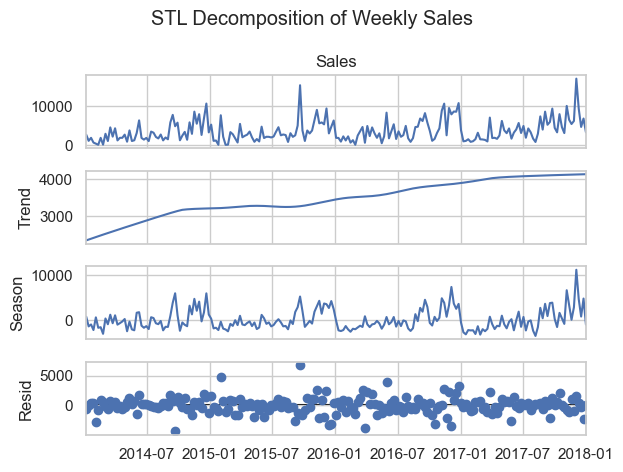

In [37]:
import seaborn as sns
from statsmodels.tsa.seasonal import STL


# Group sales data by week (starting Monday) and sum
weekly_sales = w_store_sales.groupby(
    pd.Grouper(key='Order Date', freq='W-Mon')
)['Sales'].sum()

# Ensure index is datetime and enforce weekly frequency
weekly_sales.index = pd.to_datetime(weekly_sales.index)
weekly_sales = weekly_sales.asfreq('W-Mon')  # Enforce weekly frequency (start on Monday)


# Apply STL decomposition with seasonal period of 52 (weeks per year)
stl = STL(weekly_sales, seasonal=53)
result = stl.fit()

# Plot decomposition result
result.plot()
plt.suptitle('STL Decomposition of Weekly Sales')
plt.tight_layout()
plt.show()

In [38]:
# Extract residuals
residuals = result.resid

# Compute mean and variance
mean_resid = residuals.mean()
var_resid = residuals.var()

print(f"Residual Mean: {mean_resid:.2f}")


# Compute explained variance ratio
resid_var = result.resid.var()
total_var = weekly_sales.var()

unexplained_ratio = resid_var / total_var
explained_ratio = 1 - unexplained_ratio

print(f"Explained variance ratio: {explained_ratio:.2%}")


Residual Mean: 11.70
Explained variance ratio: 76.06%


**ACF** shows significant autocorrelation at lags 1–4 (≈ one month), indicating short-term memory in sales.  
**PACF** shows strong direct effects at lags 1–3, then quickly declines.  
**Conclusion**: Sales exhibit time-based self-correlation, supporting the use of lag and rolling features.

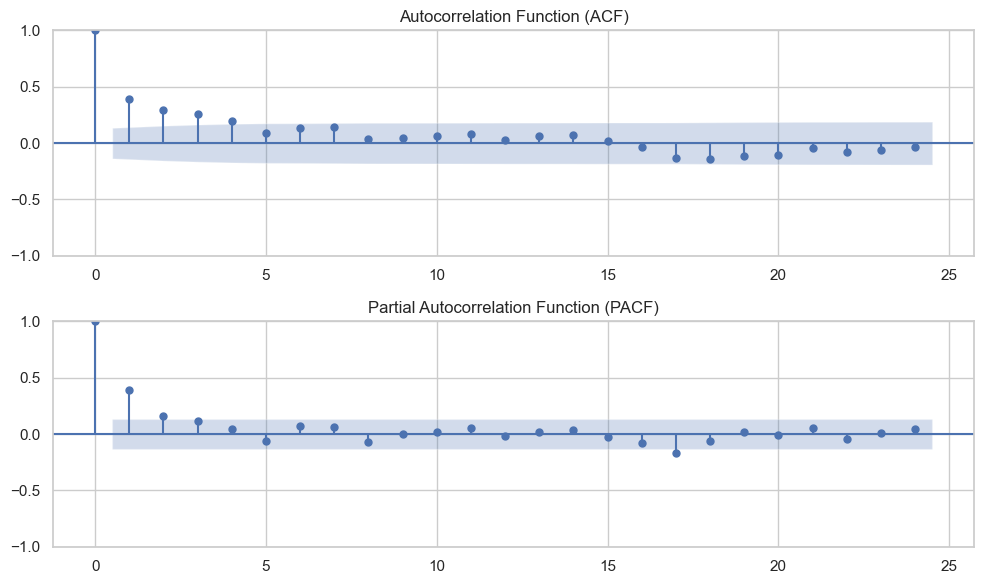

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to examine autocorrelations
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(weekly_sales, ax=axes[0], lags=24)
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(weekly_sales, ax=axes[1], lags=24, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

### 4.3 Heatmap Analysis of Time-Related Variables

A holiday flag was created based on the analysis in Section 4.2, marking the week before Christmas and the week before Black Friday as holiday periods.

In [40]:
import pandas as pd

# Ensure the date column is in datetime format
df_encoded['Order Date'] = pd.to_datetime(df_encoded['Order Date'])

# Extract ISO calendar year and week number from the order date
df_encoded['order_year'] = df_encoded['Order Date'].dt.isocalendar().year
df_encoded['order_week'] = df_encoded['Order Date'].dt.isocalendar().week

# Create a list to store all (year, week) combinations that are considered holiday weeks
holiday_weeks = []

# Loop through each year to identify the holiday weeks
for year in df_encoded['order_year'].unique():
    # 🎄 Christmas week: the week starting on Dec 18
    christmas_week = pd.Timestamp(f'{year}-12-18').isocalendar().week

    # 🦃 Black Friday prep week: one week before Thanksgiving (4th Thursday of November)
    thanksgiving_range = pd.date_range(start=f'{year}-11-20', end=f'{year}-11-30')
    thanksgiving_thursday = [d for d in thanksgiving_range if d.weekday() == 3][0]  # weekday 3 = Thursday
    black_friday_week = (thanksgiving_thursday - pd.Timedelta(days=7)).isocalendar().week

    # Add both weeks to the list
    holiday_weeks.append((year, christmas_week))
    holiday_weeks.append((year, black_friday_week))

# Flag each row if its (year, week) matches a known holiday week
df_encoded['holiday_flag'] = df_encoded.apply(
    lambda row: int((row['order_year'], row['order_week']) in holiday_weeks),
    axis=1
)


In [41]:
# display the selected date for the holiday flag
holiday_dates = df_encoded[df_encoded['holiday_flag'] == 1]['Order Date'].unique()
print("Holiday dates with flag set to 1:")
for date in holiday_dates:
    print(date.strftime('%Y-%m-%d'))

Holiday dates with flag set to 1:
2015-11-21
2016-11-20
2017-11-19
2016-12-18
2016-12-15
2015-11-20
2016-12-13
2017-11-14
2014-11-11
2016-11-19
2017-12-18
2014-12-20
2014-12-19
2014-12-15
2015-12-20
2015-11-22
2017-12-22
2017-12-23
2014-11-12
2015-11-16
2017-11-18
2017-11-17
2014-12-16
2015-12-15
2014-11-10
2017-12-24
2016-12-14
2015-11-19
2016-12-17
2016-11-18
2017-11-15
2017-12-21
2014-11-14
2016-11-14
2016-12-12
2015-12-17
2017-11-13
2015-12-18
2014-11-15
2014-11-16
2017-12-19
2015-12-14
2014-12-21
2015-11-17
2016-12-16
2017-11-16
2015-12-19
2016-11-15


Compute the linear correlations between the holiday flag, time-related features, and weekly sales.

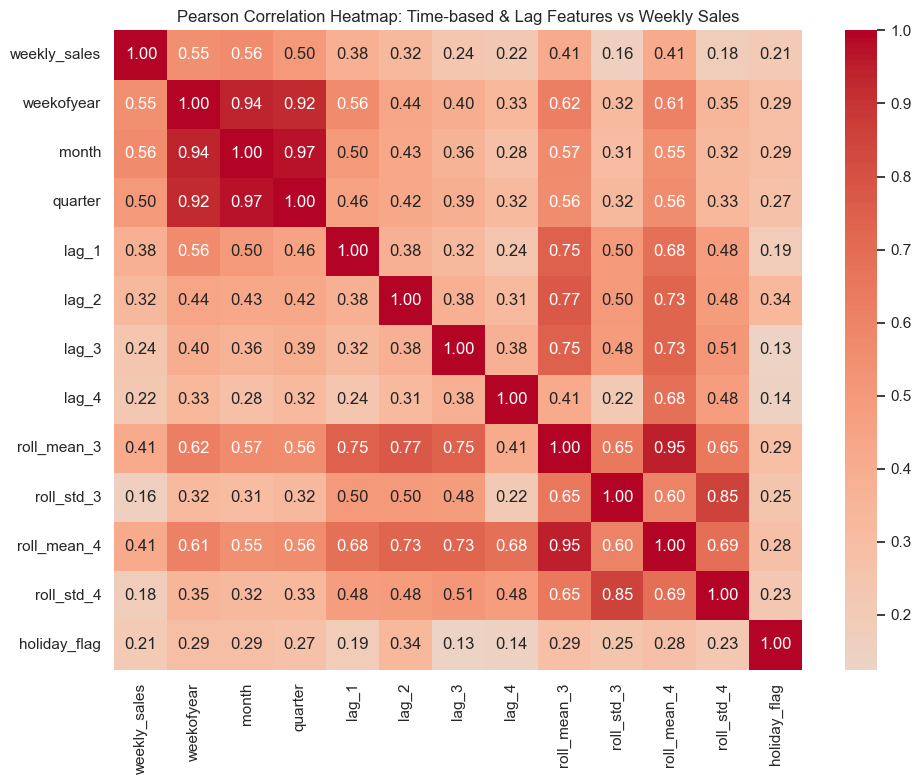

In [42]:
df_encoded['Order Date'] = pd.to_datetime(df_encoded['Order Date'])

# Step 1: Resample both Sales and Holiday Flag into weekly format
df_encoded['Order Date'] = pd.to_datetime(df_encoded['Order Date'])  # ensure datetime

weekly_df = (
    df_encoded
    .set_index('Order Date')
    .resample('W')
    .agg({
        'Sales': 'sum',
        'holiday_flag': 'max'  # only one holiday flag per week
    })
    .reset_index()
    .rename(columns={'Sales': 'weekly_sales'})
    .rename(columns={'Order Date': 'Week Start Date'}
))


# --- Step 2: Create time-related features ---
weekly_df['weekofyear'] = weekly_df['Week Start Date'].dt.isocalendar().week
weekly_df['month'] = weekly_df['Week Start Date'].dt.month
weekly_df['quarter'] = weekly_df['Week Start Date'].dt.quarter
weekly_df['year'] = weekly_df['Week Start Date'].dt.year

# --- Step 3: Create lag features (1 to 4 weeks) ---
for lag in range(1, 5):
    weekly_df[f'lag_{lag}'] = weekly_df['weekly_sales'].shift(lag)

# --- Step 4: Create rolling features (mean and std over 3 and 4 weeks) ---
weekly_df['roll_mean_3'] = weekly_df['weekly_sales'].shift(1).rolling(window=3).mean()
weekly_df['roll_std_3'] = weekly_df['weekly_sales'].shift(1).rolling(window=3).std()
weekly_df['roll_mean_4'] = weekly_df['weekly_sales'].shift(1).rolling(window=4).mean()
weekly_df['roll_std_4'] = weekly_df['weekly_sales'].shift(1).rolling(window=4).std()

# --- Step 5: Compute Pearson correlation and plot heatmap ---
features = ['weekly_sales', 'weekofyear', 'month', 'quarter', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
            'roll_mean_3', 'roll_std_3', 'roll_mean_4', 'roll_std_4','holiday_flag']

corr = weekly_df[features].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap: Time-based & Lag Features vs Weekly Sales')
plt.tight_layout()
plt.show()

Correlation analysis shows that month, weekofyear, and lag_1 have moderate positive correlations with weekly sales (≈0.5 or above), indicating useful time-based patterns.  
roll_mean_3 and roll_mean_4 also show meaningful correlations (~0.41), capturing recent sales momentum.  
Other lag and rolling std features have weak correlations and are not recommended.

## 5. Summary

After the above cleaning and analysis, the dataset is clean and exhibits strong seasonality, making it suitable for weekly-level forecasting.  
 
Time features, holiday flags, and selected numerical and categorical variables should be retained for modeling.  

Despite some multicollinearity (e.g., roll_mean_3 and roll_mean_4 in Figure 11), all features can be initially included and later refined based on importance.

In summary, the selected features for modeling are as follows:

**Target variables**:weekly_sales

**Time-based features**: including calendar indicators such as weekofyear, month, quarter, and year.

**Lag and rolling features**: such as lag_1 to lag_4, roll_mean_3, roll_std_3, roll_mean_4, and roll_std_4, capturing short-term patterns and local trends.

**Categorical features (one-hot encoded)**: including segment, region, sub_category, and shipping mode indicators.

**numerical features**:  'Discount','Quantity'


**Note**:  
Due to the creation of lag features, the combined dataset contains some missing values at the beginning.
Currently, there are 32 features, which may require further refinement depending on the modeling approach:

For linear models such as Ridge, highly correlated variables should be removed to avoid multicollinearity.

For tree-based models, since the number of features exceeds 10% of the total sample size, a staged approach is recommended: start with time-related features as the baseline, then incrementally add categorical features while using feature importance to guide pruning.